# Experiment 3 Results

In [1]:
from visualization.utils import make_defaults, get_track_and_states_df,  wandb2df, plot_states
from visualization.utils import defaults as d
from helpers.paths import Path
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.lines as mlines

make_defaults()

## Summary results

In [2]:
df_sac_de_summary = pd.read_csv(Path().data / 'exp3_fault_fp41w198_summary.csv')
df_dsac_de_summary = pd.read_csv(Path().data / 'exp3_fault_wartuvh0_summary.csv')
df_sac_da_summary = pd.read_csv(Path().data / 'exp3_fault_ciavee5i_summary.csv')
df_dsac_da_summary = pd.read_csv(Path().data / 'exp3_fault_ckektqy3_summary.csv')

In [3]:
def nmae_metrics(df):
    df_final = df.copy()
    df_final[['online/nmae', 'eval/nmae']] *= 100
    return df_final[[ 'eval/nmae', 'online/nmae', 'hybrid_improvement']].agg(['mean', 'std'])

## Reduced elevator effectiveness

In [4]:
nmae_metrics(df_sac_de_summary)

,eval/nmae,online/nmae,hybrid_improvement
mean,18.458945,4.131754,14.327191
std,3.143008,0.905006,3.736206


In [5]:
nmae_metrics(df_dsac_de_summary)

,eval/nmae,online/nmae,hybrid_improvement
mean,22.429791,3.197123,19.232668
std,11.782759,0.655797,11.386369


## Reduced aileron effectiveness

In [6]:
nmae_metrics(df_sac_da_summary)

,eval/nmae,online/nmae,hybrid_improvement
mean,28.542224,9.134089,19.408135
std,8.478434,2.506667,10.679883


In [7]:
nmae_metrics(df_dsac_da_summary)

,eval/nmae,online/nmae,hybrid_improvement
mean,28.677080,6.078840,22.598240
std,16.901908,0.714357,16.803792


# States plots - de

In [8]:
df_sac_eval = wandb2df(pd.read_csv(Path().data / 'exp3_sac_eval_de.csv'), "eval/step")
df_sac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp3_sac_eval_states_de.csv'), "citation_states/step")
df_sac_online = wandb2df(pd.read_csv(Path().data / 'exp3_sac_online_de.csv'), "online/step")
df_sac_online_states = wandb2df(pd.read_csv(Path().data / 'exp3_sac_online_states_de.csv'), "online_states/step")

df_dsac_eval = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_eval_de.csv'), "eval/step")
df_dsac_eval_states = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_eval_states_de.csv'), "citation_states/step")
df_dsac_online = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_online_de.csv'), "online/step")
df_dsac_online.rename(columns={"action_da": "da", "action_dr": "dr", "action_de": "de"}, inplace=True)
df_dsac_online_states = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_online_states_de.csv'), "online_states/step")

In [27]:
def plot_fault_shadow(fig, ax):
    for ax_subplot in ax.reshape(-1):
        ax_subplot.axvspan(10, 100, facecolor='r', alpha=0.2, zorder=-100)

    state_color = "tab:blue"  # Assign consistent color to state lines
    ref_color = "tab:gray"  # Assign consistent color to reference lines
    state_line = mlines.Line2D([], [], color=state_color, label='State')
    ref_line = mlines.Line2D([], [], color=ref_color, linestyle="dashed", label='Reference')
    span_shadow = ax[0, 0].axvspan(0, 0, facecolor='r', alpha=0.2, zorder=-100, label="Fault")
    fig.legend(handles=[state_line, ref_line, span_shadow], loc='upper center', ncol=3, fontsize=12)

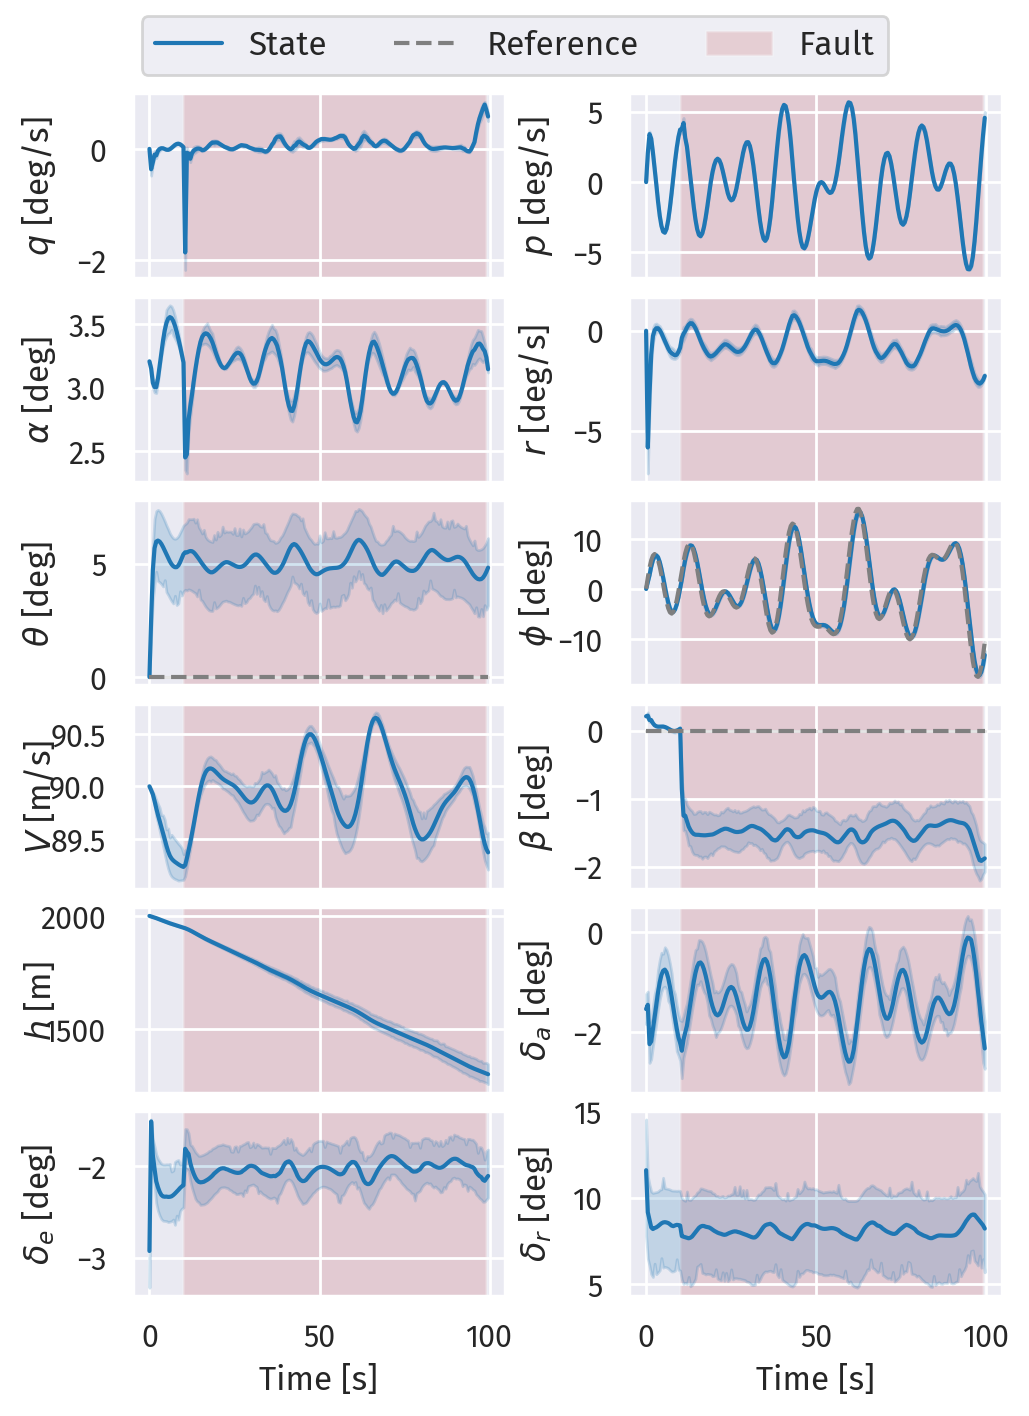

In [26]:
df_track, df_states = get_track_and_states_df(df_dsac_de_summary, df_dsac_eval, df_dsac_eval_states)
fig, ax = plot_states(df_track, df_states, with_legend=False)
plot_fault_shadow(fig, ax)

if False:
    plt.savefig(Path().paper_figures / 'exp3_dsac_only_de.pdf', bbox_inches='tight')

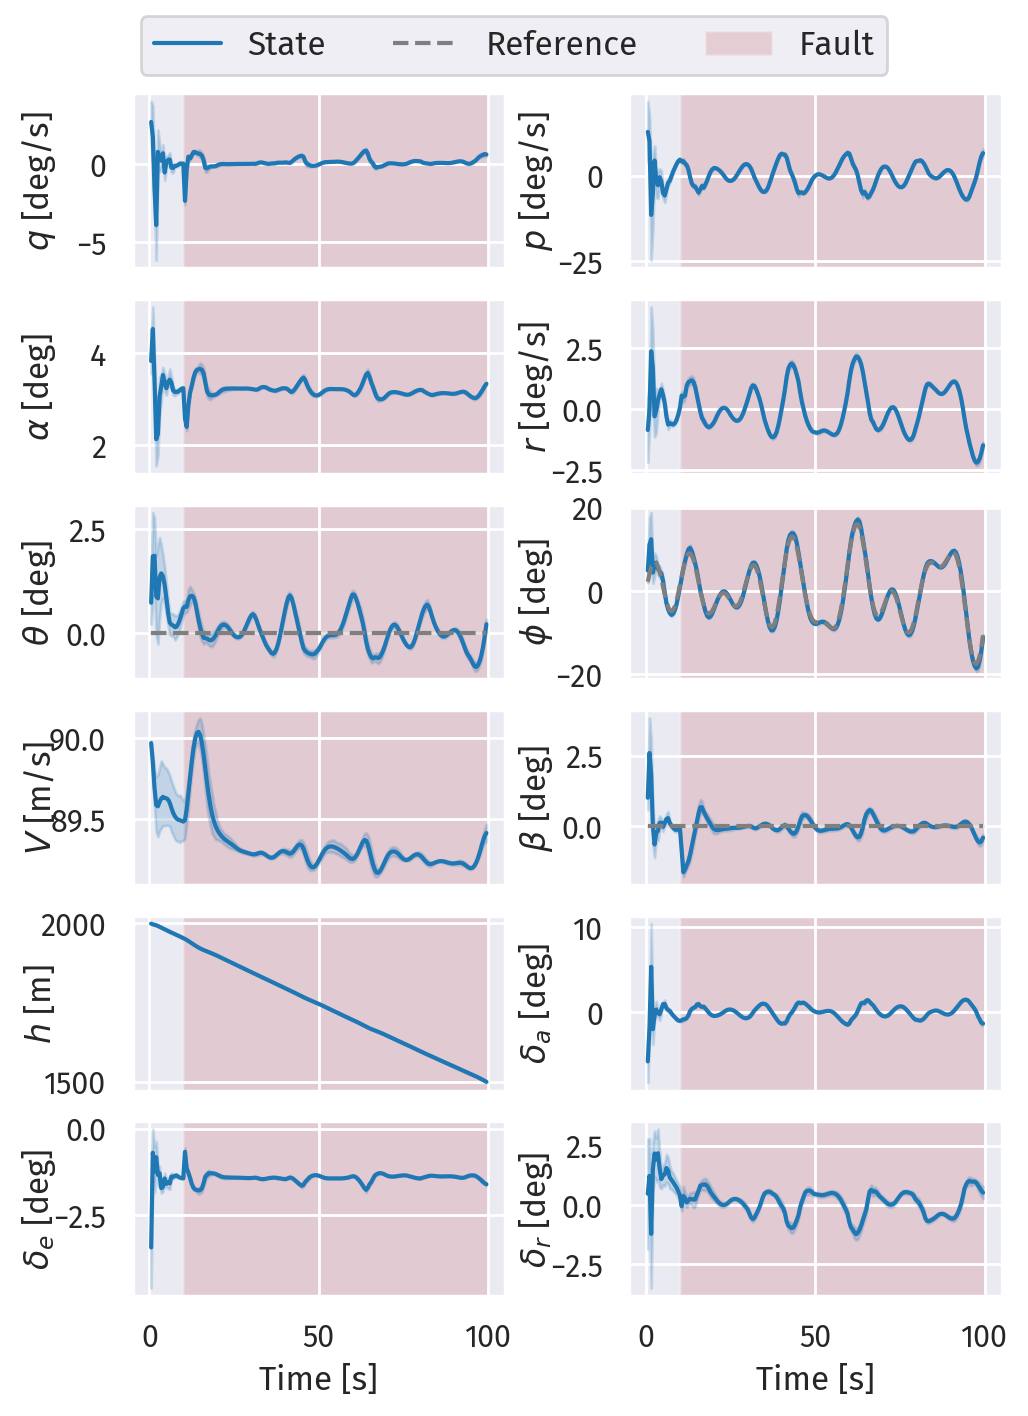

In [20]:
df_track, df_states = get_track_and_states_df(df_dsac_de_summary, df_dsac_online, df_dsac_online_states)
fig, ax = plot_states(df_track, df_states, with_legend=False)
plot_fault_shadow(fig, ax)

if False:
    plt.savefig(Path().paper_figures / 'exp3_dsac_hybrid_de.pdf', bbox_inches='tight')

## States plots - da

In [16]:
df_sac_eval_da = wandb2df(pd.read_csv(Path().data / 'exp3_sac_eval_da.csv'), "eval/step")
df_sac_eval_states_da = wandb2df(pd.read_csv(Path().data / 'exp3_sac_eval_states_da.csv'), "citation_states/step")
df_sac_online_da = wandb2df(pd.read_csv(Path().data / 'exp3_sac_online_da.csv'), "online/step")
df_sac_online_states_da = wandb2df(pd.read_csv(Path().data / 'exp3_sac_online_states_da.csv'), "online_states/step")

df_dsac_eval_da = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_eval_da.csv'), "eval/step")
df_dsac_eval_states_da = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_eval_states_da.csv'), "citation_states/step")
df_dsac_online_da = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_online_da.csv'), "online/step")
df_dsac_online_da.rename(columns={"action_da": "da", "action_dr": "dr", "action_de": "de"}, inplace=True)
df_dsac_online_states_da = wandb2df(pd.read_csv(Path().data / 'exp3_dsac_online_states_da.csv'), "online_states/step")

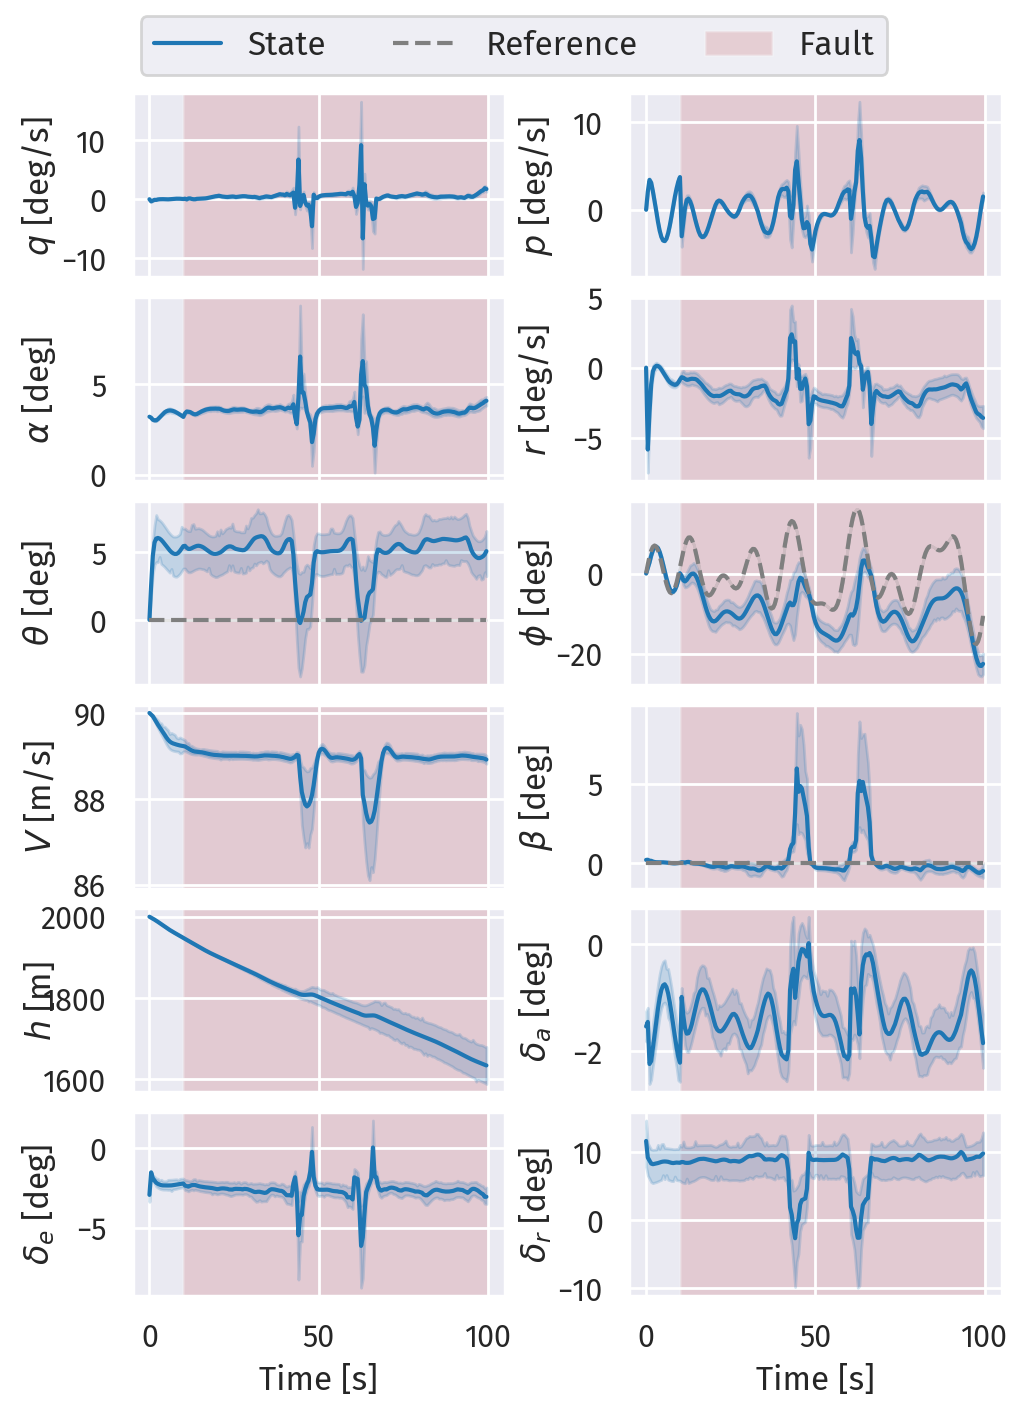

In [21]:
df_track, df_states = get_track_and_states_df(df_dsac_da_summary, df_dsac_eval_da, df_dsac_eval_states_da)
fig, ax = plot_states(df_track, df_states, with_legend=False)
plot_fault_shadow(fig, ax)

if False:
    plt.savefig(Path().paper_figures / 'exp3_dsac_only_da.pdf', bbox_inches='tight')

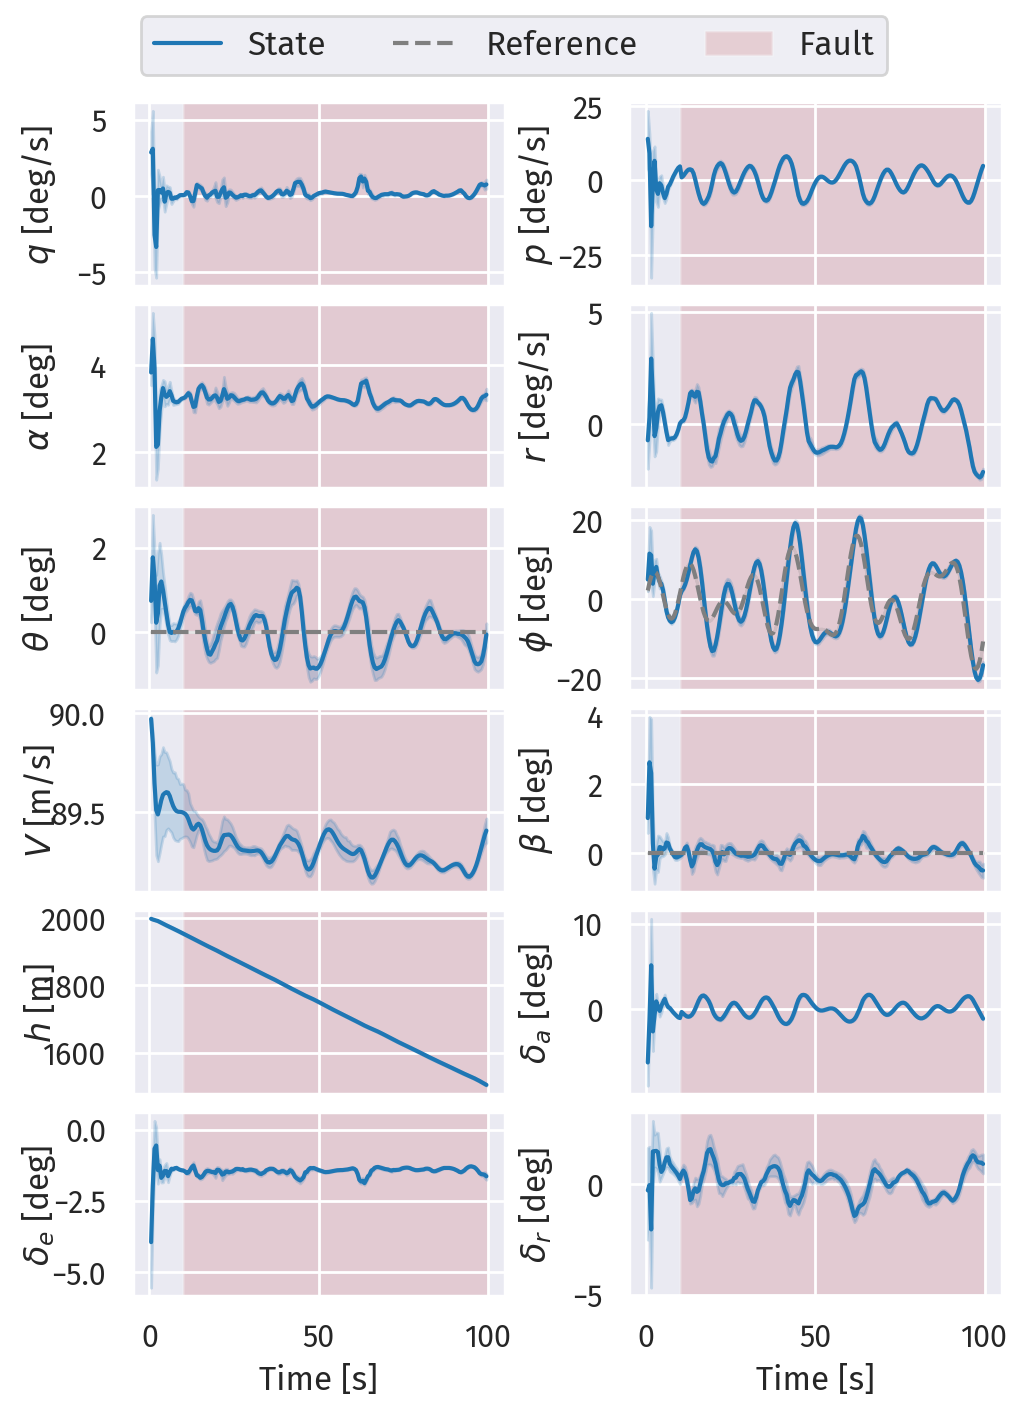

In [22]:
df_track, df_states = get_track_and_states_df(df_dsac_da_summary, df_dsac_online_da, df_dsac_online_states_da)
fig, ax = plot_states(df_track, df_states, with_legend=False)
plot_fault_shadow(fig, ax)

if False:
    plt.savefig(Path().paper_figures / 'exp3_dsac_hybrid_da.pdf', bbox_inches='tight')